#### 라이브러리 및 데이터 불러오기

In [10]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data  = pd.read_csv(file_url)

In [11]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


인덱스 1338개 (1338행), 1338명에 대한 데이터가 있다

In [12]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


5줄만 출력하여 더 간결하게 볼 수 있다

(연속형 변수) - 나이, 키

(범주형 변수) - 계절, 성멸 등

sex 1 남자, 0 여자

smoker 1 흡연자, 0 비흡연자

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


non-null : 결측치가 없다 (빈 값이 없다)

In [14]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [ ]:
# 소숫점 2까지 반올림

round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


#### 전처리 - 학습셋과 실험셋 나누기

In [16]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

사이킷런 sklearn에서 학습셋과 테스트셋을 나누어주는 모듈을 제공한다.

x_train : 독립변수 학습셋 / y_train : 종속변수 학습셋

x_test : 독립변수 학습셋 / y_test : 종속변수 시험셋

random_state : 데이터를 특정 비율로 나눌 때 랜덤하게 섞어서 샘플링한다 (state는 시드값이다.)

#### 모델링

In [ ]:
# sklearn에서 제공하는 선형회귀 라이브러리 모듈 LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# fit : 모델에 학습을 시킨다

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### 모델 활용하여 예측하기

In [ ]:
# predict을 이용해 모델로 결과 예측을 진행할 수 있다.
# - 학습 때 사용한 독립 변수를 가진 데이터를 넣어준다.

pred = model.predict(X_test)
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

# 비교 표 (실제 결과, 예측 결과)
comparison


,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


<Axes: xlabel='actual', ylabel='pred'>

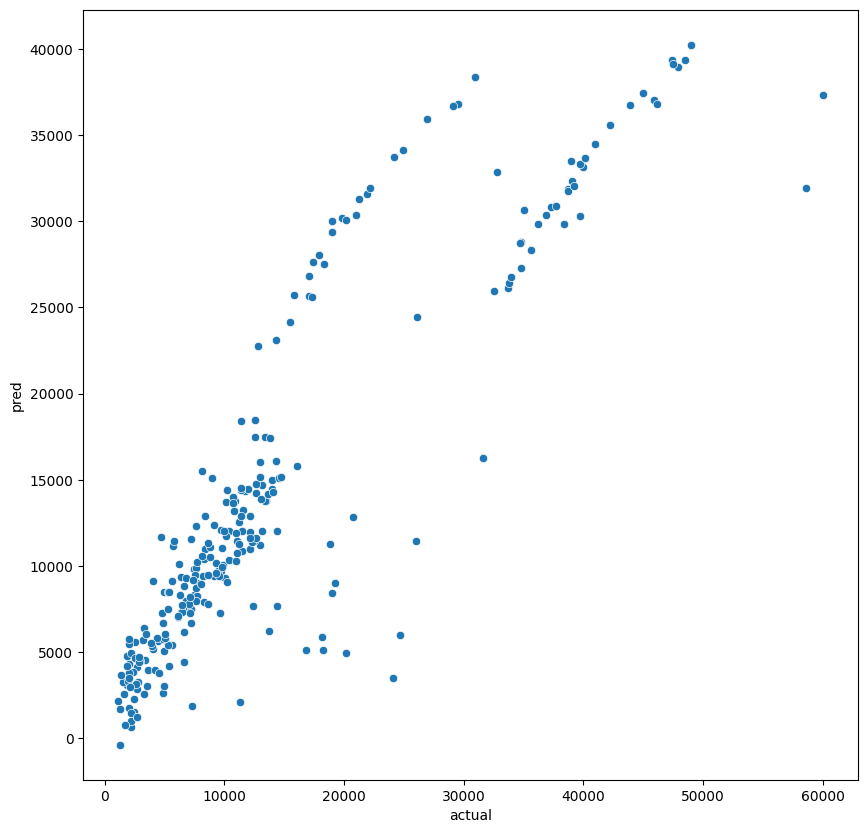

In [31]:
import matplotlib.pyplot as plt # ❶
import seaborn as sns # ❷

plt.figure(figsize=(10,10)) # ❶ 그래프 크기를 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) # ❷

X축이 실제 결과, Y 축이 예측 결과이며,

Linear한 것을 확인하면 1차 함수일 때 상관관계를 가장 잘 확인할 수 있지만 / 현재 그래프는 3개의 구간으로 나뉘게 된다.

1차 함수와 가장 가까운 데이터는 실제값과 예측이 비슷한, = 비교적 예측이 잘 된 경우

위쪽 상단 구간은 전반적으로 실제값보다 예측값이 더 높게 나온

아래쪽 하단 구간은 전반적으로 실제값보다 예측값이 더 낮게 나온



-> 그러나 그래프로 평가하는 방식은, 테이블보다는 평가가 수월하다.

-> 어디까지나 직관적으로 예측력을 확인할 뿐이며, 객관적인 기준이 되지는 않는다.

In [23]:
from sklearn.metrics import mean_squared_error # ❶
rmse = mean_squared_error(y_test, pred) ** 0.5

model.score(X_train, y_train)

0.7368220127747351

통계적인 방법으로 평가하는 방법 (RMSE)

연속형 변수를 예측하고 평가할 때, 가장 흔하게 쓰이는 RSME는 루트 평균 제곱근 오차이다. (평균 제곱근 편차)

실제값과 예측값 사이의 오차를 각각 합산하는 개념이다.

0에 가까울 수록 좋은 지표이다

#### 선형회귀 이해하기

독립변수와 종속 변수 간의 선형 관계를 전제로 한 모델이다. 구현 및 이해가 용이다하.

Null : 값이 비어있는 것을 뜻한다. 결측치 비어있어서 알 수 없는 값, 0이 아니다.

사분위수 : 데이터를 오름차순으로 정리했을 때 25%, 50%, 75%, 위치에서 확인한 값이다. Q1 Q2 Q3로 표현한다.

오버피팅 : 모델이 학습셋에 지나치게 잘 맛도록 학습되어서 새로운 데이터에 대한 예측력이 떨어지는 현상을 의미한다.

In [ ]:
# 독립변수 5개에 대한 계수 (각 변수에 대한 기울기값 = 계수)

model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [ ]:
# 변수 이름을 포함하는 pandas로 변경하여 계수 출력

pd.Series(model.coef_, index = X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

독립변수 age가 1만큼 증가하면, 종속변수 charges는 264만큼 증가한다. sex는 범주형 변수 (비연속적 변수)이기 때문에, 1 증가하면 17 증가한다는 해석보다는, 남자(1)의 경우 여자(0)보다 charges가 보통 17정도 높다고 해석하는게 좋다.

In [ ]:
# y 절편

model.intercept_

np.float64(-11576.999976112342)

선형회귀는 각 변수값을 위 수식에 넣어 모델이 보여주는 예측값을 쉽게 확인이 가능하다. 

선형 회귀는 수식 도출이 굉장히 쉽기 때문에, 해석도 매우 직관적이다.

모델의 계수를 해석할 때 부호의 영향에 유의해야한다. 

부호와 상관없이 계수의 절대값이 클수록 영향이 크며, 절대값이 0에 가까울 수록 영향력이 거의 없다

다만, 여러 계수를 서로 비교할 때 단순히 절대값이 더 크면 더 영향력이 크다고 보기에는 무리가 있다.

그 이유는, 각 변수의 스케일이 다르기 때문이다.

예를 들면, 성별은 비연속적 독립 변수이며, 나이는 연속적인 독립 변수이다. 성별이 1 커지는 것과, 나이가 1 커지는 것이 가지는 영향력이 다르다.

스키일링 작업이 필요하며, 이는 KNN을 통해 조정할 수 있다.